# Parte 1 - Leitura do dataset e configurações iniciais

Importa as classes necessárias e monta o drive para acessar o arquivo de dados.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lê o arquivo com os dados e apresenta o dataframe

In [21]:
colunas = ['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca', 'resultado']
dados = pd.read_csv('datasets\\atv7.csv', names=colunas)
dados

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Atributos e valores:
1.  preco - Preço de venda:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.  
2.  manutencao - Custo de manutenção:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.
3.  portas - Quantidade de portas:
*  2 - duas;
*  3 - três;
*  4 - quatro;
*  5more - cinco ou mais.
4.  pessoas - Quantidade de pessoas:
*  2 - duas;
*  4 - quatro;
*  more - mais.
5.  bagageiro - Tamanho do bagageiro:
*  small - pequeno;
*  med - médio;
*  big - grande;
6.  segurança - Nível de segurança:
*  low - baixo;
*  med - médio;
*  high - alto.
7.  resultado' - Resultado sobre a análise do carro:
*  unacc - inaceitável;
*  acc - aceitável;
*  good - bom;
*  vgood - muito bom.

Transforma os valores qualitativos em codificações numéricas.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dados['preco']=le.fit_transform(dados['preco'])
dados['manutencao']=le.fit_transform(dados['manutencao'])
dados['portas']=le.fit_transform(dados['portas'])
dados['pessoas']=le.fit_transform(dados['pessoas'])
dados['bagageiro']=le.fit_transform(dados['bagageiro'])
dados['seguranca']=le.fit_transform(dados['seguranca'])
dados['resultado']=le.fit_transform(dados['resultado'])
dados.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


1. Cria a matriz X com todos atributos, exceto o resultado;
2. Cria o vetor y com o atributo resultado;
3. Divide os dados em 33% para teste e 67% para treinamento.

In [23]:
from sklearn.model_selection import train_test_split

X = dados.drop(["resultado"] ,axis="columns")
y = dados['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)

# Parte 2 - Atividade - Naive Bayes

Cria e treina um modelo de Naive Bayes Categórico **(modelo = CategoricalNB())**. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.


Cria e treina um modelo de Naive Bayes Gaussiano **(modelo = GaussianNB())**. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Em https://scikit-learn.org/1.5/modules/naive_bayes.html estão disponíveis outras distribuições que podem ser utilizadas na criação de um modelo Naive Baies.

In [24]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = CategoricalNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))    

Train set:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       258
           1       0.50      0.21      0.29        48
           2       0.93      0.97      0.95       807
           3       0.96      0.50      0.66        44

    accuracy                           0.87      1157
   macro avg       0.77      0.61      0.66      1157
weighted avg       0.86      0.87      0.86      1157

Test set:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       126
           1       1.00      0.10      0.17        21
           2       0.93      0.98      0.95       403
           3       1.00      0.48      0.65        21

    accuracy                           0.88       571
   macro avg       0.91      0.58      0.63       571
weighted avg       0.89      0.88      0.86       571



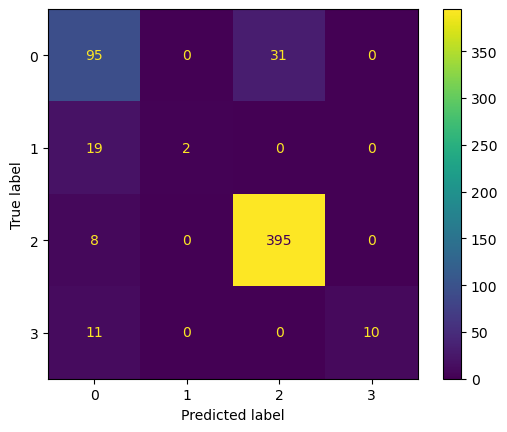

In [25]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))    

Train set:
              precision    recall  f1-score   support

           0       0.56      0.07      0.13       258
           1       0.67      0.04      0.08        48
           2       0.84      0.82      0.83       807
           3       0.13      1.00      0.23        44

    accuracy                           0.63      1157
   macro avg       0.55      0.48      0.32      1157
weighted avg       0.75      0.63      0.62      1157

Test set:
              precision    recall  f1-score   support

           0       0.52      0.10      0.17       126
           1       0.00      0.00      0.00        21
           2       0.87      0.80      0.83       403
           3       0.12      1.00      0.22        21

    accuracy                           0.63       571
   macro avg       0.38      0.48      0.31       571
weighted avg       0.73      0.63      0.63       571



c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


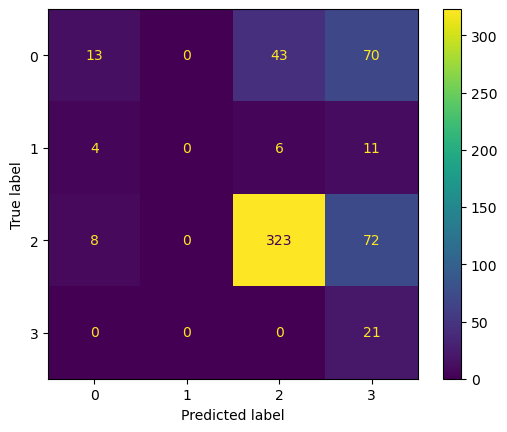

In [27]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

# Parte 3 - Atividade - Outros modelos

Cria e treina um modelo de classificação linear rígido. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

In [28]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = linear_model.Perceptron(random_state=0)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))   

Train set:
              precision    recall  f1-score   support

           0       0.34      0.14      0.19       258
           1       0.03      0.02      0.02        48
           2       0.78      0.86      0.82       807
           3       0.28      0.84      0.42        44

    accuracy                           0.66      1157
   macro avg       0.36      0.46      0.36      1157
weighted avg       0.63      0.66      0.63      1157

Test set:
              precision    recall  f1-score   support

           0       0.40      0.20      0.26       126
           1       0.00      0.00      0.00        21
           2       0.81      0.86      0.83       403
           3       0.29      0.86      0.43        21

    accuracy                           0.68       571
   macro avg       0.37      0.48      0.38       571
weighted avg       0.67      0.68      0.66       571



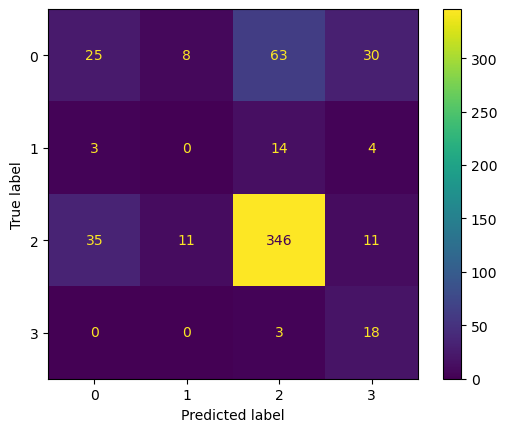

In [29]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

Cria e treina um modelo de classificação linear estocástica. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

In [30]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = linear_model.SGDClassifier(random_state=0)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))  

Train set:
              precision    recall  f1-score   support

           0       0.42      0.16      0.23       258
           1       0.00      0.00      0.00        48
           2       0.73      0.96      0.83       807
           3       0.00      0.00      0.00        44

    accuracy                           0.71      1157
   macro avg       0.29      0.28      0.26      1157
weighted avg       0.60      0.71      0.63      1157

Test set:
              precision    recall  f1-score   support

           0       0.45      0.18      0.26       126
           1       0.00      0.00      0.00        21
           2       0.75      0.96      0.84       403
           3       0.00      0.00      0.00        21

    accuracy                           0.72       571
   macro avg       0.30      0.29      0.28       571
weighted avg       0.63      0.72      0.65       571



c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packag

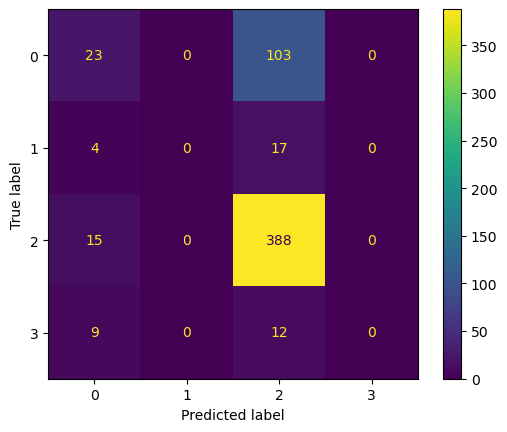

In [31]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

Cria e treina uma árvore de decisão com limite máximo de cinco níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))    

Train set:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       258
           1       0.00      0.00      0.00        48
           2       0.94      0.96      0.95       807
           3       0.52      1.00      0.69        44

    accuracy                           0.86      1157
   macro avg       0.54      0.66      0.58      1157
weighted avg       0.83      0.86      0.84      1157

Test set:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       126
           1       0.00      0.00      0.00        21
           2       0.97      0.96      0.97       403
           3       0.48      1.00      0.65        21

    accuracy                           0.88       571
   macro avg       0.54      0.68      0.59       571
weighted avg       0.86      0.88      0.87       571



c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bruno\anaconda3\Lib\site-packag

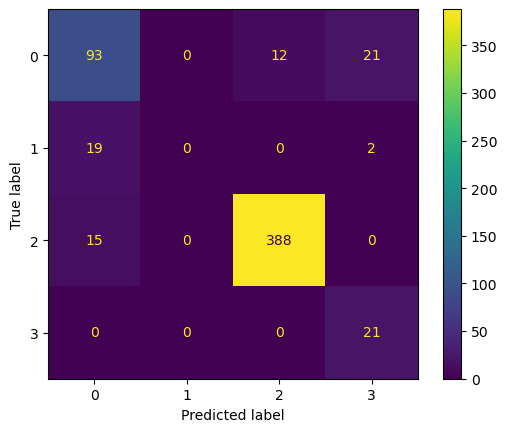

In [33]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

Apresenta a árvore de decisão gerada.

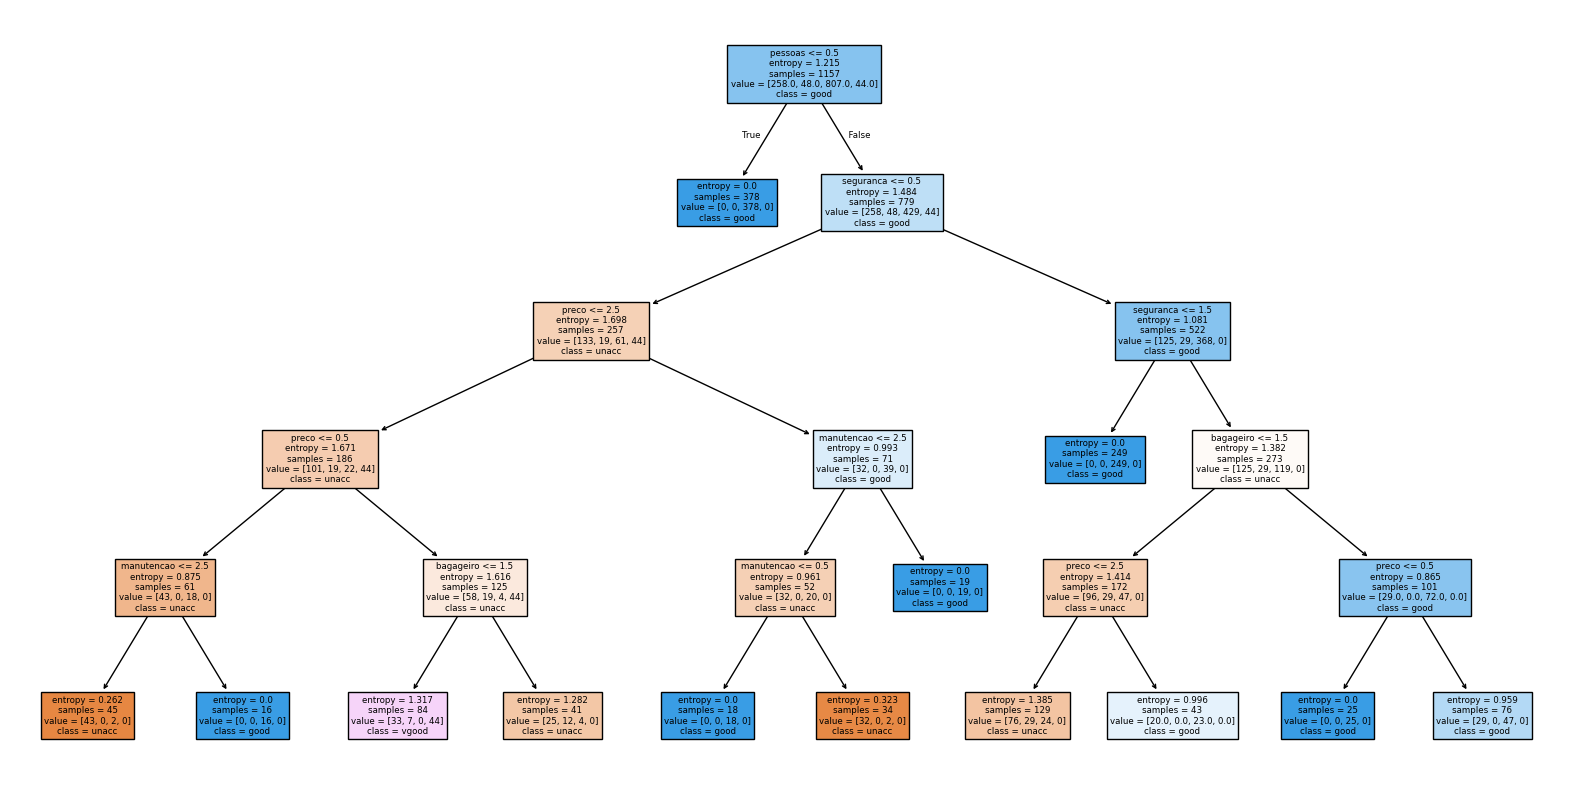

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['unacc', 'acc', 'good', 'vgood'])
plt.show()

Cria e treina uma árvore de decisão com limite máximo de dez níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

In [35]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=10)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))   

Train set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       258
           1       0.87      0.96      0.91        48
           2       1.00      0.99      1.00       807
           3       1.00      0.95      0.98        44

    accuracy                           0.99      1157
   macro avg       0.96      0.97      0.96      1157
weighted avg       0.99      0.99      0.99      1157

Test set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       126
           1       0.80      0.95      0.87        21
           2       1.00      0.99      0.99       403
           3       0.95      0.90      0.93        21

    accuracy                           0.98       571
   macro avg       0.93      0.95      0.94       571
weighted avg       0.98      0.98      0.98       571



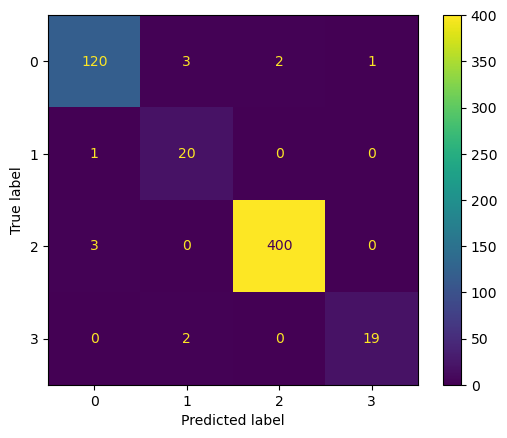

In [36]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()

Cria e treina uma random forest com limite máximo de dez níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

In [37]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = RandomForestClassifier(criterion="entropy", random_state=0, max_depth=10)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Train set:")
print(classification_report(y_train, y_train_pred))    

y_pred = model.predict(X_test)
print("Test set:")
print(classification_report(y_test, y_pred))  

Train set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       258
           1       1.00      0.96      0.98        48
           2       1.00      1.00      1.00       807
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1157
   macro avg       1.00      0.99      0.99      1157
weighted avg       1.00      1.00      1.00      1157

Test set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       126
           1       0.94      0.81      0.87        21
           2       1.00      1.00      1.00       403
           3       0.91      0.95      0.93        21

    accuracy                           0.98       571
   macro avg       0.95      0.94      0.94       571
weighted avg       0.98      0.98      0.98       571



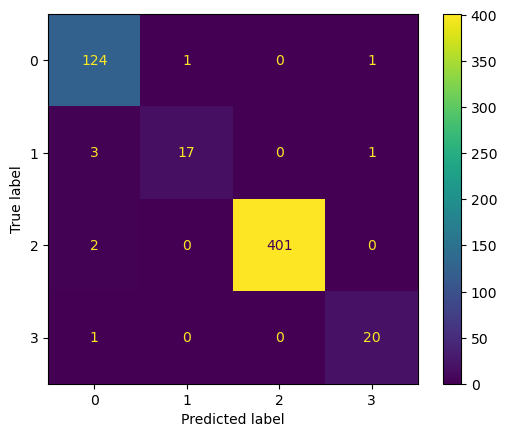

In [38]:
matriz = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matriz)
display.plot()